In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from openai import OpenAI
import getpass

In [4]:
def fetch_openf1_data(endpoint, params):
    base_url = "https://api.openf1.org/v1"
    response = requests.get(f"{base_url}/{endpoint}", params=params)
    return response.json()

In [6]:
session_key = 9161  # Replace with the desired session key
driver_number = 55  # Replace with the desired driver number
lap_data = fetch_openf1_data("laps", {"session_key": session_key, "driver_number": driver_number})

In [8]:
df_laps = pd.DataFrame(lap_data)

In [10]:
print("Columns in df_laps:")
print(df_laps.columns)
print("\nFirst few rows of df_laps:")
print(df_laps.head())
print("\nSummary statistics:")
print(df_laps.describe())

Columns in df_laps:
Index(['meeting_key', 'session_key', 'driver_number', 'i1_speed', 'i2_speed',
       'st_speed', 'date_start', 'lap_duration', 'is_pit_out_lap',
       'duration_sector_1', 'duration_sector_2', 'duration_sector_3',
       'segments_sector_1', 'segments_sector_2', 'segments_sector_3',
       'lap_number'],
      dtype='object')

First few rows of df_laps:
   meeting_key  session_key  driver_number  i1_speed  i2_speed  st_speed  \
0         1219         9161             55       271       250       NaN   
1         1219         9161             55       311       280     302.0   
2         1219         9161             55       133       159     217.0   
3         1219         9161             55       149       130     147.0   
4         1219         9161             55       315       280     302.0   

                         date_start  lap_duration  is_pit_out_lap  \
0  2023-09-16T13:01:02.636000+00:00           NaN            True   
1  2023-09-16T13:03:14.24400

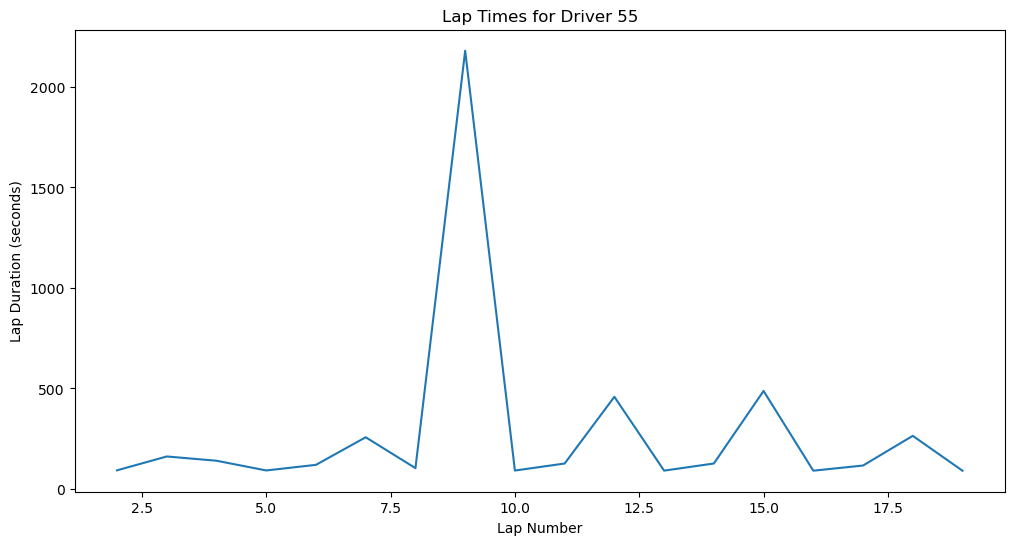

In [12]:
df_laps_filtered = df_laps.dropna(subset=['lap_duration'])

# Visualize lap times
plt.figure(figsize=(12, 6))
sns.lineplot(x='lap_number', y='lap_duration', data=df_laps_filtered)
plt.title(f"Lap Times for Driver {df_laps['driver_number'].iloc[0]}")
plt.xlabel("Lap Number")
plt.ylabel("Lap Duration (seconds)")
plt.show()

In [14]:
fastest_lap = df_laps_filtered['lap_duration'].min()
average_lap = df_laps_filtered['lap_duration'].mean()
slowest_lap = df_laps_filtered['lap_duration'].max()

print(f"\nFastest Lap: {fastest_lap:.3f} seconds")
print(f"Average Lap: {average_lap:.3f} seconds")
print(f"Slowest Lap: {slowest_lap:.3f} seconds")


Fastest Lap: 90.984 seconds
Average Lap: 283.146 seconds
Slowest Lap: 2180.259 seconds


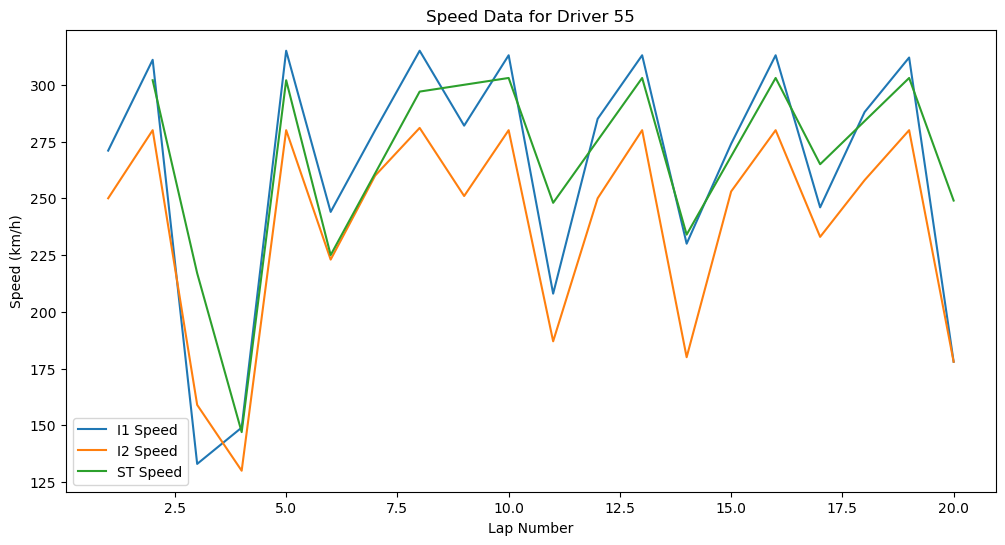

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='lap_number', y='i1_speed', data=df_laps, label='I1 Speed')
sns.lineplot(x='lap_number', y='i2_speed', data=df_laps, label='I2 Speed')
sns.lineplot(x='lap_number', y='st_speed', data=df_laps, label='ST Speed')
plt.title(f"Speed Data for Driver {df_laps['driver_number'].iloc[0]}")
plt.xlabel("Lap Number")
plt.ylabel("Speed (km/h)")
plt.legend()
plt.show()

In [18]:
avg_i1_speed = df_laps['i1_speed'].mean()
avg_i2_speed = df_laps['i2_speed'].mean()
avg_st_speed = df_laps['st_speed'].mean()
max_speed = max(df_laps['i1_speed'].max(), df_laps['i2_speed'].max(), df_laps['st_speed'].max())

print(f"\nAverage I1 Speed: {avg_i1_speed:.2f} km/h")
print(f"Average I2 Speed: {avg_i2_speed:.2f} km/h")
print(f"Average ST Speed: {avg_st_speed:.2f} km/h")
print(f"Max Speed: {max_speed:.2f} km/h")


Average I1 Speed: 263.00 km/h
Average I2 Speed: 238.65 km/h
Average ST Speed: 264.14 km/h
Max Speed: 315.00 km/h


In [20]:
analysis_data = {
    "driver_number": driver_number,
    "total_laps": len(df_laps_filtered),
    "fastest_lap": fastest_lap,
    "average_lap": average_lap,
    "slowest_lap": slowest_lap,
    "avg_i1_speed": avg_i1_speed,
    "avg_i2_speed": avg_i2_speed,
    "avg_st_speed": avg_st_speed,
    "max_speed": max_speed
}

In [22]:
openai_api_key = getpass.getpass("Please enter your OpenAI API key: ")
client = OpenAI(api_key=openai_api_key)

Please enter your OpenAI API key:  ········


In [24]:
def get_ai_analysis(data):
    prompt = f"""
    Analyze the following Formula 1 race data for driver number {data['driver_number']}:
    
    1. Total laps: {data['total_laps']}
    2. Fastest lap: {data['fastest_lap']:.3f} seconds
    3. Average lap: {data['average_lap']:.3f} seconds
    4. Slowest lap: {data['slowest_lap']:.3f} seconds
    5. Average I1 Speed: {data['avg_i1_speed']:.2f} km/h
    6. Average I2 Speed: {data['avg_i2_speed']:.2f} km/h
    7. Average ST Speed: {data['avg_st_speed']:.2f} km/h
    8. Max Speed: {data['max_speed']:.2f} km/h

    Provide a brief analysis of the driver's performance, including any notable trends or patterns in lap times, and comments on their speed performance.
    """
    
    response = client.chat.completions.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": "You are a Formula 1 race analyst providing insights on driver performance."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=300
    )
    
    return response.choices[0].message.content

In [26]:
ai_analysis = get_ai_analysis(analysis_data)
print("\nAI Analysis:")
print(ai_analysis)


AI Analysis:
From the data provided, it can be observed that the performance of driver number 55 has been inconsistent.

The fastest lap time recorded by the driver is 90.984 seconds, which demonstrates a competitive level of speed. However, there are quite extreme variances in the driver's lap times, with an average of 283.146 seconds and an incredibly slow maximum of 2180.259 seconds. The slowest lap is approximately 24 times slower than the fastest, indicating either a major problem during one or more laps (such as mechanical issues, or a crash), or inconsistent driving performance throughout the race.

The speed statistics show relatively consistent average speeds for the first (I1) and second (I2) intervals, with average speeds of 263.00 km/h and 238.65km/h, respectively. The average speed through the start-finish line (ST Speed) is slightly higher at 264.14 km/h. The max speed attained by the driver is impressive at 315.00 km/h.

In conclusion, while the driver has shown the pot

In [28]:
del openai_api_key